# Coding Patterns

## Prefix Sum

Query the sum of elements in a subarray

imagine you are given an array and you need to find the sum of all elements between indexes I and J

* if you have just one query you can simply Loop through the array in linear time to find the sum
* if you have multiple such queries it can take up to order of n * m time complexity where m is the number of queries and N is the length of the array to make such queries faster you can create a prefix sumary where value at index I is the sum of all elements from start up to index I in the given array now you can arrange some queries in O of one time using the formula

$$P[i] = A[0] + A[1] + ... + A[i]$$

$$SUM[i,j] = P[j] - P[i-1]$$

one thing to remember is that you don't always need a new array for prefix sums sometimes you can use the input array itself and avoid using extra space, like this:

In [10]:
def create_prefix_sum(arr):
    # This code is used to create a prefix sum of an array.
    # It takes in an array as input and returns a new array with the prefix sum of the input array.
    for i in range(1, len(arr)):
        arr[i] += arr[i-1]
    return arr

### Example 1: (303) Range Sum Query - Immutable

Given an integer array `nums`, handle multiple queries of the following type:

Calculate the sum of the elements of `nums` between indices `left` and `right` inclusive where `left <= right`.

Implement the `NumArray` class:

`NumArray(int[] nums)` Initializes the object with the integer array `nums`.
`int sumRange(int left, int right)` Returns the sum of the elements of `nums` between indices `left` and `right` inclusive (i.e. `nums[left] + nums[left + 1] + ... + nums[right]`).

Example 1:

**Input**
```
["NumArray", "sumRange", "sumRange", "sumRange"]
[[[-2, 0, 3, -5, 2, -1]], [0, 2], [2, 5], [0, 5]]
```
**Output**
```
[null, 1, -1, -3]
```
**Explanation**
```
NumArray numArray = new NumArray([-2, 0, 3, -5, 2, -1]);
numArray.sumRange(0, 2); // return (-2) + 0 + 3 = 1
numArray.sumRange(2, 5); // return 3 + (-5) + 2 + (-1) = -1
numArray.sumRange(0, 5); // return (-2) + 0 + 3 + (-5) + 2 + (-1) = -3
```

**Constraints:**

* `1 <= nums.length <= 10^4`
* `-10^5 <= nums[i] <= 10^5`
* `0 <= left <= right < nums.length`
* At most `10^4` calls will be made to `sumRange`.

In [2]:
from typing import List

class NumArray:

    def __init__(self, nums: List[int]):
        n = len(nums)
        self.prefix_sum = [0] * n
        self.prefix_sum[0] = nums[0]
        for i in range(1,n):
            self.prefix_sum[i] = self.prefix_sum[i-1] + nums[i]

    def sumRange(self, left: int, right: int) -> int:
        return self.prefix_sum[right] - self.prefix_sum[left - 1] if left > 0 else self.prefix_sum[right]


obj = NumArray(nums=[-2, 0, 3, -5, 2, -1])
obj.sumRange(left=1,right=5)

-1

The time complexity is `O(n)` for building the prefix sum, and `O(1)` for lookup and subtraction. The memory complexity is `O(n)` to store the prefix sum array.

#### Easy Memory Optimization

If memory is a concern, we can reduce the memory but at the cost of slower queries. For example, 

```py
class NumArray:
    def __init__(self, nums: List[int]):
        self.nums = nums  # Store original

    def sumRange(self, left: int, right: int) -> int:
        return sum(self.nums[left:right+1])
```

This renders time complexity of `O(1)` for `__init__` and `O(r - l + 1)` for query, and memory `O(n)` (but does not need to load in `nums`).

#### Segment Tree

For scalability and access to ability to `update`, we can use Segment Trees.

How it works:

* The tree is built as a flat array of size `2n`:
  * Leaves are stored in `tree[n:]`
  * Internal nodes are in `tree[1:n]`
* Each node contains the sum of its children's ranges.
  

**Why is it O(log n)?**
1. Tree Height
A Segment Tree is a **complete binary tree**, where:
* Each level halves the number of nodes
* Number of levels (tree height) is: `height=log₂(n)`

For example, if `n=8`:

```text
Level 0:          [0..7]          ← root
               /         \
Level 1:     [0..3]     [4..7]
            /     \     /     \
Level 2:  [0..1] [2..3] [4..5] [6..7]
         /   \   /   \  /   \  /   \
Level 3:[0] [1] [2] [3][4] [5][6] [7] ← leaves
```

There are `log₂(n)` levels from root to any leaf.


In [3]:
from typing import List

class NumArray:

    def __init__(self, nums: List[int]):
        self.n = len(nums)
        self.tree = [0] * (2 * self.n)
        # Build tree (insert leaves)
        for i in range(self.n):
            self.tree[self.n + i] = nums[i]
        # Build internal nodes
        for i in range(self.n - 1, 0, -1):
            self.tree[i] = self.tree[2 * i] + self.tree[2 * i + 1]

    def update(self, index: int, val: int) -> None:
        # Set value at position index
        pos = index + self.n
        self.tree[pos] = val
        # Update ancestors
        while pos > 1:
            pos //= 2
            self.tree[pos] = self.tree[2 * pos] + self.tree[2 * pos + 1]

    def sumRange(self, left: int, right: int) -> int:
        # Sum on interval [left, right]
        left += self.n
        right += self.n
        total = 0
        while left <= right:
            if left % 2 == 1:
                total += self.tree[left]
                left += 1
            if right % 2 == 0:
                total += self.tree[right]
                right -= 1
            left //= 2
            right //= 2
        return total

obj = NumArray(nums=[-2, 0, 3, -5, 2, -1])
obj.sumRange(left=1,right=5)

-1


#### Summary of Optimization

| Approach           | `sumRange()` Time | Memory | Supports `update()`? |
| ------------------ | ----------------- | ------ | -------------------- |
| Prefix sum | `O(1)`            | `O(n)` | ❌                    |
| On-demand sum      | `O(n)`            | `O(n)` | ❌                    |
| Segment tree       | `O(log n)`        | `O(n)` | ✅                    |

As a reminder, for large arrays (say `n>1000`), `O(log n)` is already **orders of magnitude faster** than `O(n)`.

| `n`       | `log₂(n)` |
| --------- | --------- |
| 10        | \~3.3     |
| 100       | \~6.6     |
| 1,000     | \~10      |
| 1,000,000 | \~20      |

Also, the more **queries/updates** that you do, the better `O(log n)` becomes overall.

**Example**: You want to perform `q` range queries.

* Prefix sum:
    * Build: `O(n)`
    * Each query: `O(1)`
    * Total: `O(n + q)`
Segment tree:
    * Build: `O(n)`
    * Each query: `O(log n)`
    * Total: `O(n + q·log n)`

So prefix sum is better **until**:

```q·log n > q  ⟹ log n > 1  ⟹ n > 2```

But if you also allow updates (which prefix sum cannot do efficiently), segment tree dominates:
* Prefix sum updates: `O(n)`
* Segment tree updates: `O(log n)`

So if you're doing many updates, segment trees are far better for `n > ~32` or so.

### Example 2 (525): Contiguous Array

Given a binary array `nums`, return the maximum length of a contiguous subarray with an equal number of `0` and `1`.

**Example 1:**

Input: `nums = [0,1]`
Output: `2`
Explanation: `[0, 1] is the longest contiguous subarray with an equal number of 0 and 1.`

**Example 2:**

Input: `nums = [0,1,0]`
Output: `2`
Explanation: `[0, 1] (or [1, 0]) is a longest contiguous subarray with equal number of 0 and 1.`

**Example 3:**

Input: `nums = [0,1,1,1,1,1,0,0,0]`
Output: `6`
Explanation: `[1,1,1,0,0,0] is the longest contiguous subarray with equal number of 0 and 1.`
 
**Constraints:**
* `1 <= nums.length <= 105`
* `nums[i]` is either `0` or `1`.

In [4]:
from typing import List

class Solution:

    def findMaxLength(self, nums: List[int]) -> int:
        dic = {}
        dic[0] = -1
        ans = 0
        count = 0

        for i in range(len(nums)):
            if nums[i] == 1:
                count += 1
            else:
                count -= 1
            
            if count in dic:
                ans = max(ans, i - dic[count])
            else:
                dic[count] = i
        return ans

Solution().findMaxLength([0,0,1,0,0,0,1,1])

6

Imagine a `count` variable, which is used to store the relative number of ones and zeros encountered so far while traversing the array. The `count` variable is incremented by one for every 1 encountered and the same is decremented by one for every 0 encountered.

We start traversing the array from the beginning. If at any moment, the `count` becomes zero, it implies that we've encountered an equal number of zeros and ones from the beginning till the current index of the array(i). Not only this, another point to be noted is that if we encounter the same `count` twice (for any value, not just 0) while traversing the array, it means that the number of zeros and ones are equal between the indices corresponding to the equal `count` values. The following figure illustrates the observation for the sequence `[0 0 1 0 0 0 1 1]`:

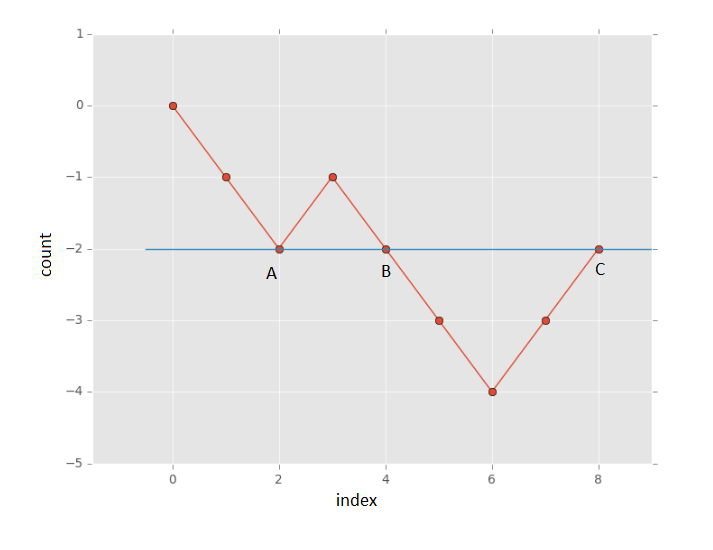

In the above figure, the subarrays between (A,B), (B,C), and (A,C) (lying between indices corresponding to `count=−2`) have an equal number of zeros and ones.

Another point to be noted is that the largest subarray is the one between the points (A, C). Thus, if we keep a track of the indices corresponding to the same `count` values that lie farthest apart, we can determine the size of the largest subarray with equal no. of zeros and ones easily.

We can use a hash map that maps values of `count` to the first index where that `count` was seen. We maintain the value of `count` and at each index, if we have seen the same value of `count` before, it means the subarray starting from where we saw that value of `count` and ending at the current index has an equal number of 0s and 1s. Otherwise, we put `count` in the map for future iterations.

### Example 3 (560): Subarray Sum Equals K

Given an array of integers `nums` and an integer `k`, return the total number of subarrays whose sum equals to `k`.

A subarray is a contiguous non-empty sequence of elements within an array.

**Example 1:**

Input: `nums = [1,1,1], k = 2`
Output: `2`

**Example 2:**

Input: `nums = [1,2,3], k = 3`
Output: `2`
 
**Constraints:**
* `1 <= nums.length <= 2 * 104`
* `-1000 <= nums[i] <= 1000`
* `-107 <= k <= 107`


#### Brute force solution

In [7]:
class Solution:
    def subarraySum(self, nums: List[int], k: int) -> int:
        count = 0
        n = len(nums)
        
        for start in range(n):
            current_sum = 0
            for end in range(start, n):
                current_sum += nums[end]
                if current_sum == k:
                    count += 1
                    
        return count

Solution().subarraySum([1,2,3],3)

2

this is very slow `O(n²)` but requires no additional memory `O(1)`.  Now, let's try for a better solution, as this is not scalable at all!

In [10]:
class Solution:
    def subarraySum(self, nums: List[int], k: int) -> int:
        count = 0
        n = len(nums)
        
        dic = {}
        dic[0] = 1
        
        current_sum = 0
        for end in range(n):
            current_sum += nums[end]
            if current_sum - k in dic:
                count += dic[current_sum - k]
            dic[current_sum] = dic.get(current_sum, 0) + 1
                    
        return count

Solution().subarraySum(nums = [3, 4, 7, 2, -3, 1, 4, 2], k = 7)

4

this is a **prefix sum + hash map** solution.

Here's an example of how it works for `nums=[1,1,1], k=2`

| Index | Num | Current Sum | Needed (current\_sum - k) | dic before    | count |
| ----- | --- | ----------- | ------------------------- | ------------- | ----- |
| 0     | 1   | 1           | -1                        | {0:1}         | 0     |
| 1     | 1   | 2           | 0                         | {0:1, 1:1}    | 1     |
| 2     | 1   | 3           | 1                         | {0:1,1:1,2:1} | 2     |

There is 1 occurrence of 1 in dic, which means there's 1 subarray ending at index 2 whose sum is k.

Now, here's an example with multiple subarray options, `nums = [3, 4, 7, 2, -3, 1, 4, 2], k = 7`

| Index | num | current\_sum | current\_sum - k | `count` change      | `count` total | `dic` before update                     |
| ----- | --- | ------------ | ---------------- | ------------------- | ------------- | --------------------------------------- |
| 0     | 3   | 3            | -4               | +0                  | 0             | {0:1}                                   |
| 1     | 4   | 7            | 0                | +1 (found dic\[0])  | 1             | {0:1, 3:1}                              |
| 2     | 7   | 14           | 7                | +1 (found dic\[7])  | 2             | {0:1, 3:1, 7:1}                         |
| 3     | 2   | 16           | 9                | +0                  | 2             | {0:1, 3:1, 7:1, 14:1}                   |
| 4     | -3  | 13           | 6                | +0                  | 2             | {0:1, 3:1, 7:1, 14:1, 16:1}             |
| 5     | 1   | 14           | 7                | +1 (found dic\[7])  | 3             | {0:1, 3:1, 7:1, 14:1, 16:1, 13:1}       |
| 6     | 4   | 18           | 11               | +0                  | 3             | {0:1, 3:1, 7:1, 14:2, 16:1, 13:1}       |
| 7     | 2   | 20           | 13               | +1 (found dic\[13]) | 4             | {0:1, 3:1, 7:1, 14:2, 16:1, 13:1, 18:1} |

The idea is that we want to count the number of times that a `current_sum` occurs that way when we see that `current_sum - k` has been a previous `current_sum`, then it will represent the number of times that the subarray would add to `k`.

## Two Pointers

two variables and move them towards each other or away from each other (e.g. check for palindrome)

### Example 1 (167): Two Sum II - Input Array Is Sorted

Given a 1-indexed array of integers `numbers` that is **already sorted in non-decreasing order**, find two numbers such that they add up to a specific `target` number. Let these two numbers be `numbers[index1]` and `numbers[index2]` where `1 <= index1 < index2 <= numbers.length`.

Return the indices of the two numbers, `index1` and `index2`, added by one as an integer array `[index1, index2]` of length 2.

The tests are generated such that there is exactly one solution. You may not use the same element twice.

Your solution must use only constant extra space.
 

**Example 1:**

Input: `numbers = [2,7,11,15], target = 9`
Output: `[1,2]`
Explanation: The sum of 2 and 7 is 9. Therefore, index1 = 1, index2 = 2. We return [1, 2].

**Example 2:**

Input: `numbers = [2,3,4], target = 6`
Output: `[1,3]`
Explanation: The sum of 2 and 4 is 6. Therefore index1 = 1, index2 = 3. We return [1, 3].

**Example 3:**

Input: `numbers = [-1,0], target = -1`
Output: `[1,2]`
Explanation: The sum of -1 and 0 is -1. Therefore index1 = 1, index2 = 2. We return [1, 2].
 

**Constraints:**

* `2 <= numbers.length <= 3 * 104`
* `-1000 <= numbers[i] <= 1000` 
* `numbers` is sorted in non-decreasing order.
* `-1000 <= target <= 1000`
* The tests are generated such that there is exactly one solution.

In [13]:
class Solution:
    def twoSum(self, numbers: List[int], target: int) -> List[int]:
        left = 0
        right = len(numbers)-1
        while left < right:
            _sum = numbers[left] + numbers[right]
            if _sum > target:
                right -= 1
            elif _sum < target:
                left += 1
            else:
                return [left+1, right+1]

Solution().twoSum([2,7,11,15], 9)

[1, 2]

Time complexity: `O(n)` Space complexity: `O(1)`

### Example 2 (15) : 3Sum

Given an integer array nums, return all the triplets `[nums[i], nums[j], nums[k]]` such that `i != j`, `i != k`, and `j != k`, and `nums[i] + nums[j] + nums[k] == 0`.

Notice that the solution set must not contain duplicate triplets.

**Example 1:**

Input: `nums = [-1,0,1,2,-1,-4]`

Output: `[[-1,-1,2],[-1,0,1]]`

Explanation: 
```text
nums[0] + nums[1] + nums[2] = (-1) + 0 + 1 = 0.
nums[1] + nums[2] + nums[4] = 0 + 1 + (-1) = 0.
nums[0] + nums[3] + nums[4] = (-1) + 2 + (-1) = 0.
The distinct triplets are [-1,0,1] and [-1,-1,2].
Notice that the order of the output and the order of the triplets does not matter.
```

**Example 2:**
Input: `nums = [0,1,1]`

Output: `[]`

Explanation: 
```text
The only possible triplet does not sum up to 0.
```

**Example 3:**

Input: `nums = [0,0,0]`

Output: `[[0,0,0]]`

Explanation: 
```text
The only possible triplet sums up to 0.
```
 
Constraints:

* `3 <= nums.length <= 3000`
* `-105 <= nums[i] <= 105`

In [14]:
class Solution:
    def threeSum(self, nums: List[int]) -> List[List[int]]:
        res = []
        nums.sort()

        for i in range(len(nums)):
            if i > 0 and nums[i] == nums[i-1]:
                continue
            
            j = i + 1
            k = len(nums) - 1

            while j < k:
                total = nums[i] + nums[j] + nums[k]

                if total > 0:
                    k -= 1
                elif total < 0:
                    j += 1
                else:
                    res.append([nums[i], nums[j], nums[k]])
                    j += 1

                    while nums[j] == nums[j-1] and j < k:
                        j += 1
        
        return res

Solution().threeSum([-1,0,1,2,-1,-4])

[[-1, -1, 2], [-1, 0, 1]]

Time complexity: `O(n^2)` Space complexity: `O(n)`. Depends on language you use. In python, sorting algorithm use Timsort which uses `O(n)` space.

### Example 3 (11): Container with Most Water

You are given an integer array `height` of length `n`. There are `n` vertical lines drawn such that the two endpoints of the `ith` line are `(i, 0)` and `(i, height[i])`.

Find two lines that together with the x-axis form a container, such that the container contains the most water.

Return the maximum amount of water a container can store.

Notice that you may not slant the container.

**Example 1:**

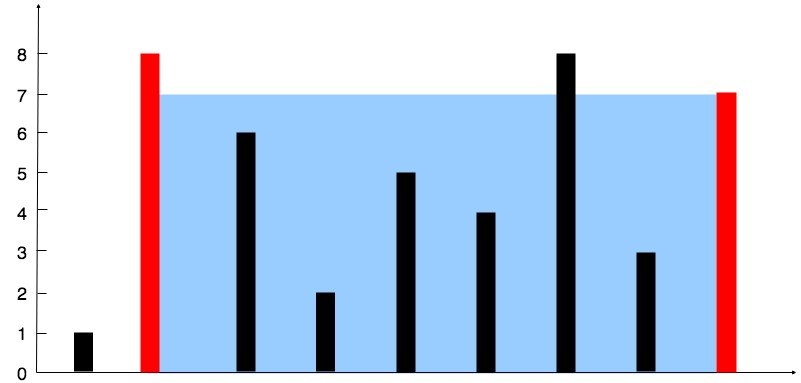

Input: `height = [1,8,6,2,5,4,8,3,7]`

Output: `49`

Explanation: `The above vertical lines are represented by array [1,8,6,2,5,4,8,3,7]. In this case, the max area of water (blue section) the container can contain is 49.
Example 2:`

Input: `height = [1,1]`
Output: `1`
 

Constraints:

* `n == height.length`
* `2 <= n <= 105`
* `0 <= height[i] <= 104`

In [17]:
class Solution:
    def maxArea(self, height: List[int]) -> int:
        max_area = 0
        left = 0
        right = len(height) - 1

        while left < right:
            max_area = max(max_area, (right - left) * min(height[left], height[right]))

            if height[left] < height[right]:
                left += 1
            else:
                right -= 1
        
        return max_area

Solution().maxArea([1,8,6,2,5,4,8,3,7])

49

## Sliding Window

helps us find subarrays or sub stings that meet a specific criteria

suppose you given an array and you need to find the subarray of size K with the maximum sum let's say k is three. 

Brute Force approach is to consider all the sub arays of size three using a nested For Loop and pick the one with the maximum sum but since the adjust server is overlap there is lot of repetitive calculation leading to a Time complexity of order of `n * K`

we can optimize this using sliding window approach we start by initializing a window containing the sum of first three elements and as we iterate through the array we subtract the leftmost item add new items value to the window and update the result this reduces time complexity to order of `n`

### Example 1 (643): Maximum Average Subarray I

You are given an integer array nums consisting of `n` elements, and an integer `k`.

Find a contiguous subarray whose length is equal to `k` that has the maximum average value and return this value. Any answer with a calculation error less than $10^{-5}$ will be accepted.

**Example 1:**

Input: `nums = [1,12,-5,-6,50,3], k = 4`
Output: `12.75000`

Explanation: 
```Maximum average is (12 - 5 - 6 + 50) / 4 = 51 / 4 = 12.75```

**Example 2:**

Input: `nums = [5], k = 1`
Output: `5.00000`

Constraints:

* `n == nums.length`
* `1 <= k <= n <= 105`
* `-104 <= nums[i] <= 104`

In [18]:
class Solution:
    def findMaxAverage(self, nums: List[int], k: int) -> float:
        n = len(nums)
        moving_sum = sum(nums[:k])
        max_avg = moving_sum / min(k, n)
        for i in range(k,n):
            moving_sum += (nums[i] - nums[i-k])
            max_avg = max(max_avg, moving_sum/k)
        return max_avg

Solution().findMaxAverage(nums = [1,12,-5,-6,50,3], k = 4)

12.75

### Example 2 (3): Longest Substring Without Repeating Characters

Given a string `s`, find the length of the longest substring without duplicate characters.

**Example 1:**

Input: `s = "abcabcbb"`

Output: `3`

Explanation: ```The answer is "abc", with the length of 3.```

**Example 2:**

Input: `s = "bbbbb"`

Output: `1`

Explanation: ```The answer is "b", with the length of 1.```

**Example 3:**

Input: `s = "pwwkew"`

Output: `3`

Explanation: ```The answer is "wke", with the length of 3.
Notice that the answer must be a substring, "pwke" is a subsequence and not a substring.```
 

Constraints:

* `0 <= s.length <= 5 * 104`
* `s` consists of English letters, digits, symbols and spaces.

In [21]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        n = len(s)
        max_length = 0
        left = 0
        for right in range(1,n+1):
            if len(set(s[left:right]))==right-left:
                max_length = max(max_length, right-left)
            else:
                left += 1
                
        return max_length

Solution().lengthOfLongestSubstring(s = "abcabcbb")

3

### Example 3 (76): Minimum Window Substring

Given two strings `s` and `t` of lengths `m` and `n` respectively, return the minimum window substring of `s` such that every character in `t` (including duplicates) is included in the window. If there is no such substring, return the empty string "".

The testcases will be generated such that the answer is unique.

**Example 1:**

Input: `s = "ADOBECODEBANC", t = "ABC"`

Output: `"BANC"`

Explanation: ```The minimum window substring "BANC" includes 'A', 'B', and 'C' from string t.```

**Example 2:**

Input: `s = "a", t = "a"`

Output: `"a"`

Explanation: ```The entire string s is the minimum window.```

**Example 3:**

Input: `s = "a", t = "aa"`
Output: `""`
Explanation: ```Both 'a's from t must be included in the window.
Since the largest window of s only has one 'a', return empty string.```

Constraints:

* `m == s.length`
* `n == t.length`
* `1 <= m, n <= 105`
* `s` and `t` consist of uppercase and lowercase English letters.

Follow up: Could you find an algorithm that runs in `O(m + n)` time?

In [22]:
class Solution:
    def minWindow(self, s: str, t: str) -> str:
        # Count the frequencies for chars in t
        hash_map = dict()
        for c in t:
            if c in hash_map:
                hash_map[c] += 1
            else:
                hash_map[c] = 1

        start, end = 0, 0

        # If the minimal length doesn't change, it means there's no valid window
        min_window_length = len(s) + 1

        # Start point of the minimal window
        min_window_start = 0

        # Works as a counter of how many chars still need to be included in a window
        num_of_chars_to_be_included = len(t)

        while end < len(s):
            # If the current char is desired
            if s[end] in hash_map:
                # Then we decreased the counter, if this char is a "must-have" now, in a sense of critical value
                if hash_map[s[end]] > 0:
                    num_of_chars_to_be_included -= 1
                # And we decrease the hash_map value
                hash_map[s[end]] -= 1

            # If the current window has all the desired chars
            while num_of_chars_to_be_included == 0:
                # See if this window is smaller
                if end - start + 1 < min_window_length:
                    min_window_length = end - start + 1
                    min_window_start = start

                # if s[start] is desired, we need to update the hash_map value and the counter
                if s[start] in hash_map:
                    hash_map[s[start]] += 1
                    # Still, update the counter only if the current char is "critical"
                    if hash_map[s[start]] > 0:
                        num_of_chars_to_be_included += 1

                # Move start forward to find a smaller window
                start += 1

            # Move end forward to find another valid window
            end += 1

        if min_window_length == len(s) + 1:
            return ""
        else:
            return s[min_window_start:min_window_start + min_window_length]

Solution().minWindow(s = "ADOBECODEBANC", t = "ABC")

'BANC'

## Fast and Slow Pointers

helps solve problems related to link list and arrays which involves finding Cycles

it works by moving two pointers at different speeds

find the middle note of a link list in one pass when the fast pointer reaches the end the slow pointer will be at the middle of the link list

### Example 1 (141): Linked List Cycle

Given `head`, the head of a linked list, determine if the linked list has a cycle in it.

There is a cycle in a linked list if there is some node in the list that can be reached again by continuously following the `next` pointer. Internally, `pos` is used to denote the index of the node that tail's `next` pointer is connected to. Note that `pos` is not passed as a parameter.

Return `true` if there is a cycle in the linked list. Otherwise, return `false`.

**Example 1:**

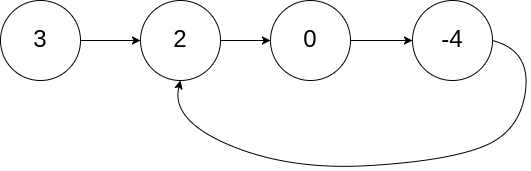

Input: `head = [3,2,0,-4], pos = 1`

Output: `true`

Explanation: ```There is a cycle in the linked list, where the tail connects to the 1st node (0-indexed).```

**Example 2:**

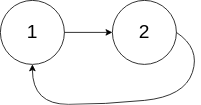

Input: `head = [1,2], pos = 0`
Output: `true`
Explanation: ```There is a cycle in the linked list, where the tail connects to the 0th node.```

**Example 3:**

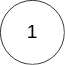

Input: `head = [1], pos = -1`
Output: `false`
Explanation: ```There is no cycle in the linked list.```


Constraints:

* The number of the nodes in the list is in the range `[0, 104].`
* `-105 <= Node.val <= 105`
* `pos` is `-1` or a valid index in the linked-list.
 

Follow up: Can you solve it using O(1) (i.e. constant) memory?

In [27]:
from typing import Optional

class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def create_linked_list_with_cycle(values, pos):
    if not values:
        return None

    head = ListNode(values[0])
    current = head
    cycle_node = None

    for i in range(1, len(values)):
        current.next = ListNode(values[i])
        current = current.next
        if i == pos:
            cycle_node = current

    if pos == 0:
        cycle_node = head

    if pos != -1:
        current.next = cycle_node

    return head


class Solution:
    def hasCycle(self, head: Optional[ListNode]) -> bool:
    
        fast = head
        slow = head
        
        while fast and fast.next:
            fast = fast.next.next
            slow = slow.next
            
            if fast == slow:
                return True
    
        return False

head1 = create_linked_list_with_cycle([3,2,0,-4], 1)
Solution().hasCycle(head1)

True

### Example 2 (202): Happy Number

Write an algorithm to determine if a number `n` is happy.

A happy number is a number defined by the following process:

* Starting with any positive integer, replace the number by the sum of the squares of its digits.
* Repeat the process until the number equals 1 (where it will stay), or it loops endlessly in a cycle which does not include 1.
* Those numbers for which this process ends in 1 are happy.

Return `true` if `n` is a happy number, and `false` if not.

**Example 1:**

Input: `n = 19`
Output: `true`
Explanation:

```12 + 92 = 82
82 + 22 = 68
62 + 82 = 100
12 + 02 + 02 = 1
```

**Example 2:**

Input: `n = 2`
Output: `false`
 
Constraints:

* `1 <= n <= 231 - 1`


In [29]:
class Solution:
    def isHappy(self, n: int) -> bool:    
        visit = set()
        
        def get_next_number(n):    
            output = 0
            
            while n:
                digit = n % 10
                output += digit ** 2
                n = n // 10
            
            return output

        while n not in visit:
            visit.add(n)
            n = get_next_number(n)
            if n == 1:
                return True
        
        return False

Solution().isHappy(19)

True

### Example 3 (287): Find the Duplicate Number

Given an array of integers `nums` containing `n + 1` integers where each integer is in the range `[1, n]` inclusive.

There is only one repeated number in `nums`, return this repeated number.

You must solve the problem without modifying the array `nums` and using only constant extra space.

 

Example 1:

Input: `nums = [1,3,4,2,2]`
Output: `2`

Example 2:

Input: `nums = [3,1,3,4,2]`
Output: `3`

Example 3:

Input: `nums = [3,3,3,3,3]`
Output: `3`
 

Constraints:

* `1 <= n <= 105`
* `nums.length == n + 1`
* `1 <= nums[i] <= n`
* All the integers in nums appear only once except for precisely one integer which appears two or more times.
  
Follow up:

* How can we prove that at least one duplicate number must exist in `nums`?`
* Can you solve the problem in linear runtime complexity?

In [30]:
class Solution:
    def findDuplicate(self, nums: List[int]) -> int:
        dic = {}
        for i in nums:
            if i in dic:
                return i
            dic[i] = 1

Solution().findDuplicate([1,3,4,2,2])

2

## Linked List In-Place Reversal

An optimal way is to use 3 pointers (previous, current, next) and replace.

### Example 1 (206): Reverse Linked List

Given the `head` of a singly linked list, reverse the list, and return the reversed list.

Example 1:

Input: `head = [1,2,3,4,5]`

Output: `[5,4,3,2,1]`

Example 2:

Input: `head = [1,2]`

Output: `[2,1]`

Example 3:

Input: `head = []`
Output: `[]`

Constraints:

* The number of nodes in the list is the range `[0, 5000]`.
* `-5000 <= Node.val <= 5000`

Follow up: A linked list can be reversed either iteratively or recursively. Could you implement both?

In [38]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def create_linked_list_with_cycle(values, pos):
    if not values:
        return None

    head = ListNode(values[0])
    current = head
    cycle_node = None

    for i in range(1, len(values)):
        current.next = ListNode(values[i])
        current = current.next
        if i == pos:
            cycle_node = current

    if pos == 0:
        cycle_node = head

    if pos != -1:
        current.next = cycle_node

    return head

class Solution:
    def reverseList(self, head: ListNode) -> ListNode:
        prev = None
        curr = head
        while curr:
            next_node = curr.next  # temporarily save the next node
            curr.next = prev       # reverse the current node's pointer
            prev = curr            # move prev and curr one step forward
            curr = next_node
        return prev

head1 = create_linked_list_with_cycle([3,2,0,-4], 1)
head2 = Solution().reverseList(head1)
head2

This is O(N) in time and O(1) in space. However, if doing it recursively then it would be O(N) in time and O(N) in space.

### Example 2 (92): Reverse Linked List II

Given the `head` of a singly linked list and two integers `left` and `right` where `left <= right`, reverse the nodes of the list from position `left` to position `right`, and return the reversed list.

**Example 1:**
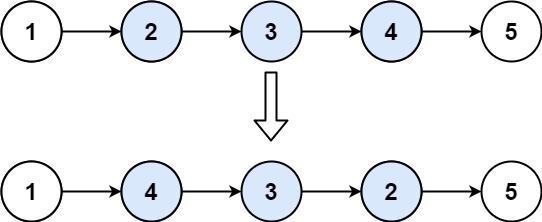
Input: `head = [1,2,3,4,5], left = 2, right = 4`

Output: `[1,4,3,2,5]`

**Example 2:**

Input: `head = [5], left = 1, right = 1`

Output: `[5]`

**Constraints:**

* The number of nodes in the list is `n`.
* `1 <= n <= 500`
* `-500 <= Node.val <= 500`
* `1 <= left <= right <= n`

Follow up: Could you do it in one pass?